<a href="https://colab.research.google.com/github/markumreed/colab_sklearn/blob/main/01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Example

[ISLR: Chapter 3](https://www.ime.unicamp.br/~dias/Intoduction%20to%20Statistical%20Learning.pdf)

You are a real estate agent and want to predict housing prices for regions in the USA. Create a model that allows to put in a few features of a house and returns back an estimate of what the house would sell for.

The data contains the following columns:

-  **Avg. Area Income**: Avg. Income of residents of the city house is located in.
- **Avg. Area House Age**: Avg Age of Houses in same city
- **Avg. Area Number of Rooms**: Avg Number of Rooms for Houses in same city
- **Avg. Area Number of Bedrooms**: Avg Number of Bedrooms for Houses in same city
- **Area Population**: Population of city house is located in
- **Price**: Price that the house sold at
- **Address**: Address for the house

## Import the Data

In [1]:
!curl https://raw.githubusercontent.com/markumreed/colab_sklearn/main/housing.csv >> housing.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  709k  100  709k    0     0  1030k      0 --:--:-- --:--:-- --:--:-- 1029k


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
housing = pd.read_csv("housing.csv")

In [4]:
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
housing.columns = [x.lower().replace(".","").replace(" ","_") for x in housing.columns] # List comprehsion

In [15]:
housing.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

## Exploratory Data Analysis

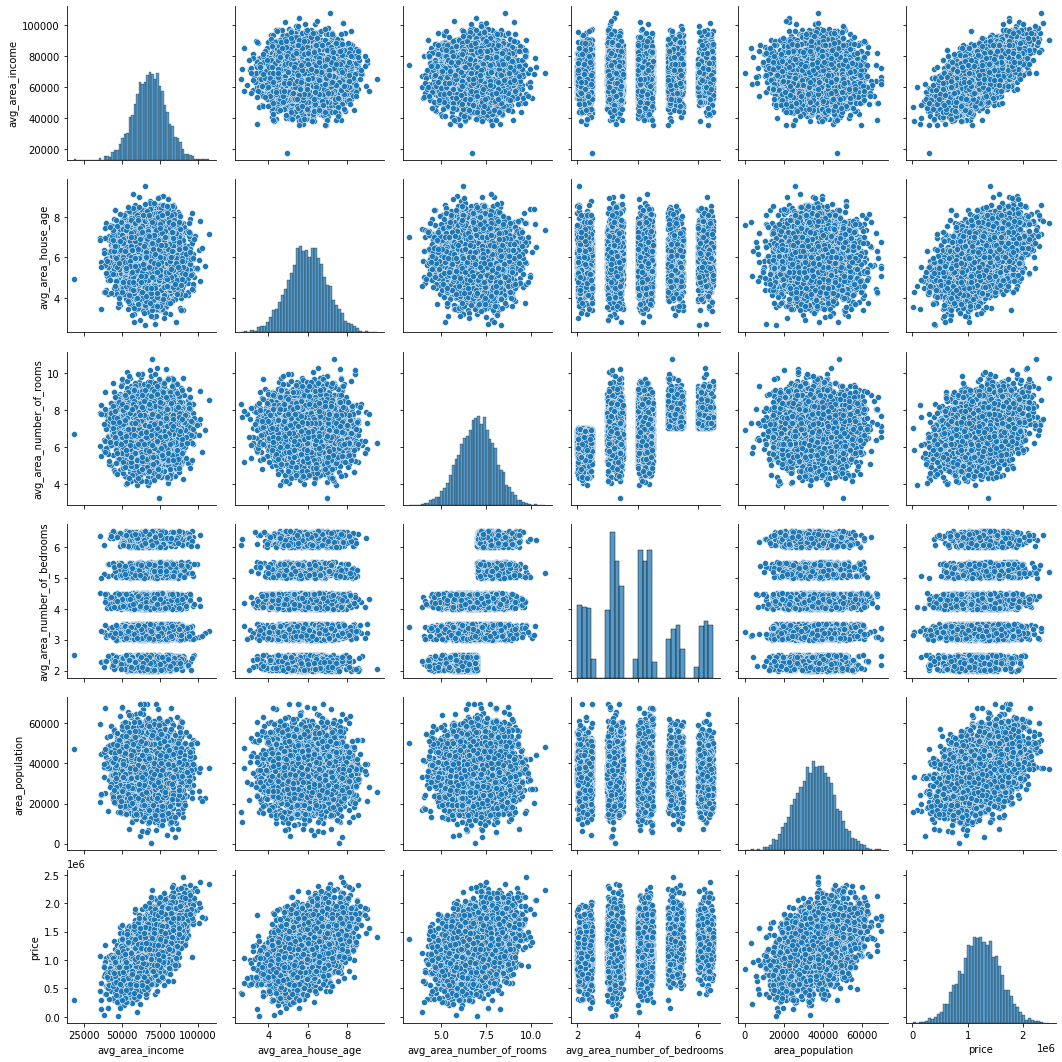

In [16]:
sns.pairplot(housing)

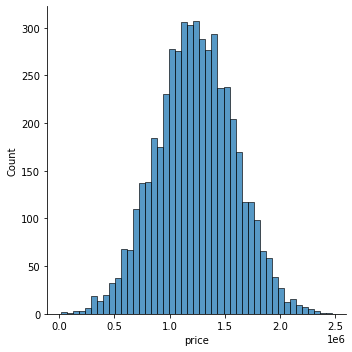

In [18]:
sns.displot(housing['price']);

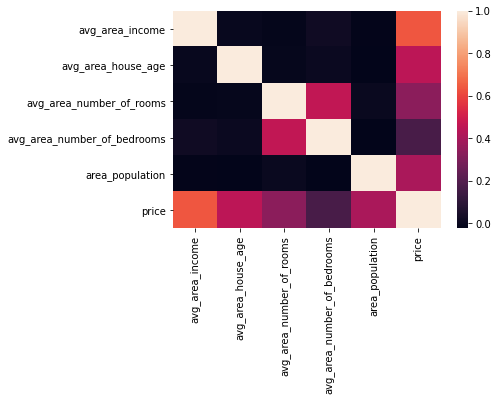

In [19]:
sns.heatmap(housing.corr());

## Linear Regression Model
- Split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. 
- Remove the Address column since it only has text info.


In [20]:
housing.columns

Index(['avg_area_income', 'avg_area_house_age', 'avg_area_number_of_rooms',
       'avg_area_number_of_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [22]:
y = housing['price']
X = housing.drop(['price','address'], axis=1)

## Train Test Split


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Create and Train Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [29]:
print(lm.intercept_)

-2638142.1104287826


In [31]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coef_df

,Coefficient
avg_area_income,21.589887
avg_area_house_age,166102.501246
avg_area_number_of_rooms,119895.936402
avg_area_number_of_bedrooms,1901.071012
area_population,15.231503


## Interpreting the results

- Ceterus Paribus === "Holding All other features fixed" (CP)
- CP, a 1 unit increase in **avg_area_income** is associated with an **increase of \$21.59**
- CP, a 1 unit increase in **avg_area_house_age** is associated with an **increase of \$166102.50**
- CP, a 1 unit increase in **avg_area_number_of_rooms** is associated with an **increase of \$119895.93**
- CP, a 1 unit increase in **avg_area_number_of_bedrooms** is associated with an **increase of \$1901.07**
- CP, a 1 unit increase in **area_population** is associated with an **increase of \$15.23**

## Model Predictions

In [32]:
predictions = lm.predict(X_test)

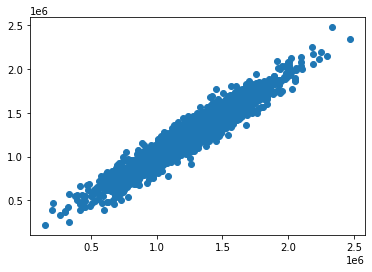

In [34]:
plt.scatter(y_test, predictions);

## Residual Plot

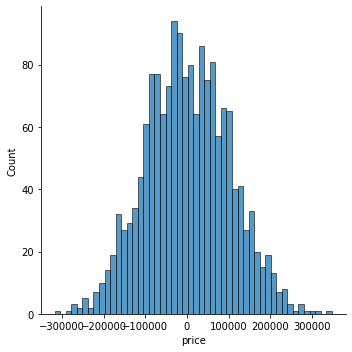

In [36]:
sns.displot((y_test - predictions), bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


In [37]:
from sklearn import metrics

In [38]:
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 80893.81190769987
MSE 10013679978.582378
RMSE 100068.37651617207


[boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [39]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)